## Section A
Binary classifier model to predict the Cardio Vascular Disease Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible

##I. Importing Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

##II. Mounting Google Drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


##III. Reading the Dataset

In [3]:
cvd = pd.read_csv("/content/drive/MyDrive/MSBA_Colab_2020/ML_Algorithms/CA05/Data/cvd_data.csv")
cvd

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4


##IV. Data Inspection and Quality Analysis

In [4]:
# Descriptive Statistics
cvd.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


In [5]:
#First Few Rows
cvd.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [6]:
#Count of Rows
cvd.count()

cvd_4types      3242
age_s1          3242
race            3242
educat          3242
mstat           3242
hip             3242
neck20          3242
waist           3242
av_weight_kg    3242
cgpkyr          3242
tea15           3242
srhype          3242
parrptdiab      3242
bend25          3242
happy25         3242
tired25         3242
hlthlm25        3242
dtype: int64

In [7]:
# Data type
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [8]:
# Check for duplicate records:
cvd.duplicated().sum()

0

In [9]:
#Cheking for Null Values
pd.isnull(cvd).sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

##V. Data Processing

Null Value Counts

In [10]:
print(cvd["cvd_4types"].value_counts())

1    1913
0    1329
Name: cvd_4types, dtype: int64


Proportions of Output Variable

*   Orange reflects the ones with Cardio Vascular Disease
*   Blue reflects the ones where Cardio Vascular Disease is absent

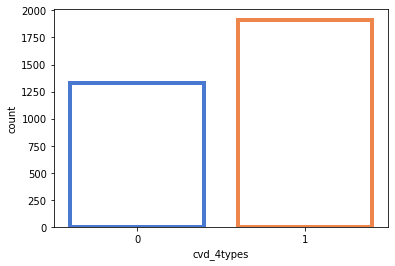

In [11]:
count_plot = sns.countplot(x="cvd_4types", data=cvd,
                   facecolor=(0, 0, 0, 0),
                   linewidth=4,
                   edgecolor=sns.color_palette("muted", 2))

Checking for Colinearity

In [12]:
cvd.corr(method ="pearson") 

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
cvd_4types,1.000000,0.089168,-0.143843,0.053662,-0.076659,0.018482,0.101653,0.203104,0.058616,0.037151,-0.028436,0.071819,0.074406,-0.009653,-0.033048,0.022130,-0.126168
age_s1,0.089168,1.000000,0.000626,-0.207595,0.013170,-0.121743,-0.001135,0.086363,0.073152,0.072336,-0.007279,0.268032,0.140819,-0.224303,-0.044323,0.012448,-0.164790
race,-0.143843,0.000626,1.000000,-0.061934,0.058878,0.030535,-0.010810,0.012960,0.045118,-0.040240,-0.005746,0.053822,0.079818,-0.064647,0.005103,-0.014226,-0.117117
educat,0.053662,-0.207595,-0.061934,1.000000,0.026047,-0.008162,0.000856,-0.057212,-0.052692,-0.047632,0.022097,-0.110072,-0.117066,0.166887,-0.093659,0.079794,0.096398
mstat,-0.076659,0.013170,0.058878,0.026047,1.000000,0.012425,-0.078962,-0.044175,-0.046429,-0.006983,0.012250,-0.002689,0.012210,-0.016304,0.033619,-0.031645,-0.055162
hip,0.018482,-0.121743,0.030535,-0.008162,0.012425,1.000000,0.321828,0.710743,0.428565,-0.006662,0.003894,0.121578,0.085835,-0.229975,0.029561,-0.131190,-0.096214
neck20,0.101653,-0.001135,-0.010810,0.000856,-0.078962,0.321828,1.000000,0.617500,0.525890,0.190235,0.022729,0.105139,0.118303,-0.091327,0.008170,0.002945,-0.010144
waist,0.203104,0.086363,0.012960,-0.057212,-0.044175,0.710743,0.617500,1.000000,0.641330,0.112615,0.014916,0.201122,0.134582,-0.246275,0.020475,-0.091524,-0.111527
av_weight_kg,0.058616,0.073152,0.045118,-0.052692,-0.046429,0.428565,0.525890,0.641330,1.000000,0.111671,0.013763,0.196695,0.094746,-0.155036,0.028020,-0.054466,-0.015056
cgpkyr,0.037151,0.072336,-0.040240,-0.047632,-0.006983,-0.006662,0.190235,0.112615,0.111671,1.000000,0.000500,0.013163,0.044049,-0.056544,0.026469,-0.051990,-0.030523


Dropping Variables

In [13]:
# Dropping "hip" as it has a high correlation to "waist"
cvd = cvd.drop(["hip"], axis=1)

Generating Dummy Variables

In [14]:
cvd = pd.get_dummies(cvd, columns=["race", "educat", "mstat", "srhype", "parrptdiab", "parrptdiab", "happy25","tired25","hlthlm25"],drop_first=True)

In [15]:
cvd.head()

,cvd_4types,age_s1,neck20,waist,av_weight_kg,cgpkyr,tea15,bend25,race_2,race_3,educat_2,educat_3,educat_4,mstat_2,mstat_3,mstat_4,mstat_8,srhype_1,parrptdiab_1,parrptdiab_1,happy25_2,happy25_3,happy25_4,happy25_5,happy25_6,tired25_2,tired25_3,tired25_4,tired25_5,tired25_6,hlthlm25_2,hlthlm25_3,hlthlm25_4,hlthlm25_5
0,0,54,40.0,108.0,87.5,34.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,56,34.0,107.0,83.5,0.0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,54,44.5,105.0,86.2,49.5,0,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,54,42.5,110.0,89.1,0.0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,51,37.0,113.0,81.3,0.0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Train Test Splitting

In [16]:

x_train, x_test, y_train, y_test = train_test_split(cvd.drop("cvd_4types",axis=1),cvd["cvd_4types"],
                                                    test_size=0.30, random_state=101)

Logistic Regression Classifier for Train

In [17]:
classifier = linear_model.LogisticRegression(C=1e40,solver="newton-cg")
model = classifier.fit(x_train,y_train)

Predicting Accuracy Score (0.70 or 70.09%)

In [18]:
y_pred = classifier.predict(x_test)
model.score(x_test,y_test)

0.7009249743062693

Best Moddel using Randomized Search and changing hyperparameters

Logistic Regression

In [19]:
log = linear_model.LogisticRegression()

Hyperparameter: Regularizing the penalty space

In [20]:
penalty = ["l1", "l2"]

Uniform Distribution for Regularization Hyperparameter

In [21]:
C = uniform(loc=0, scale=4)

Generating Hyperparameters

In [22]:
hyperparameter = dict(C = C, penalty = penalty)

Randomized Search

In [23]:
classifier = RandomizedSearchCV(log, hyperparameter, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

Fitting Randomized Search

In [24]:
model_optimum = classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Most Optimum Hyperparameters

In [25]:
print("Most Optimum Hyperparameter is", model_optimum.best_estimator_.get_params()["penalty"])
print("Most Prefferred C is", model_optimum.best_estimator_.get_params()["C"])

Most Optimum Hyperparameter is l2
Most Prefferred C is 0.7450408455106836


Target Variable

In [26]:
model_optimum.predict(x_test)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Optimum Model Score (0.70 or 70.09%)

In [27]:
model_optimum.score(x_test,y_test)

0.7009249743062693

##Section B
Feature Importance of all the features sorted in the order of decreasing influenceon the Cardio Vascular Disease Risk

##I. Ranking Attributes

Ranking in descending order of significant attributes on Cardio Vascular Disease Risk

In [28]:
model.fit(x_train/np.std(x_train,0),y_train)
print(model.coef_)

[[ 7.45243745e-02 -8.01505803e-02  5.21280711e-01 -9.60002905e-02
   5.77592529e-02 -4.42776832e-02 -8.25421196e-03 -1.29685839e-01
  -3.80028486e-01 -1.54269946e-01 -8.14551218e-02  2.94370333e-01
  -1.66758574e-01 -1.05306210e-01 -3.84176052e-01  1.86614038e-01
   2.91424187e-02  8.64283348e-02  8.64283348e-02  1.02240403e-01
  -9.29439094e-03 -2.09555934e-04 -3.54764601e-03  5.25301400e-03
   6.59130418e-02  7.61291441e-02  2.13790887e-01  2.77964482e-01
   1.33341633e-01  3.57813477e-03 -4.60676570e-02 -2.76324571e-02
  -6.34425545e-01]]


In [29]:
attributes = np.std(x_train,0)*model.coef_[0]

attributes.sort_values(ascending=False)

waist           7.140248
cgpkyr          1.169838
age_s1          0.770908
tired25_5       0.135355
tired25_4       0.103766
educat_4        0.064570
happy25_2       0.050275
tired25_6       0.035667
tired25_3       0.022250
parrptdiab_1    0.021475
parrptdiab_1    0.021475
mstat_8         0.017443
tired25_2       0.013910
srhype_1        0.013690
hlthlm25_2      0.000482
happy25_6       0.000479
happy25_4      -0.000061
happy25_5      -0.000478
happy25_3      -0.003218
bend25         -0.005551
hlthlm25_4     -0.012441
hlthlm25_3     -0.017111
mstat_3        -0.026804
race_2         -0.028329
educat_3       -0.038186
mstat_2        -0.047490
race_3         -0.050011
tea15          -0.054917
mstat_4        -0.057488
educat_2       -0.076895
hlthlm25_5     -0.184642
neck20         -0.327180
av_weight_kg   -0.741227
dtype: float64

##Section C
*   Evaluating the performance of your model(including ROC Curve)
*   Explaining the performance
*   Drawing a meaningful conclusion

##I. Classification Report

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.46      0.57       415
           1       0.69      0.88      0.77       558

    accuracy                           0.70       973
   macro avg       0.71      0.67      0.67       973
weighted avg       0.71      0.70      0.68       973



##II. ROC Curve

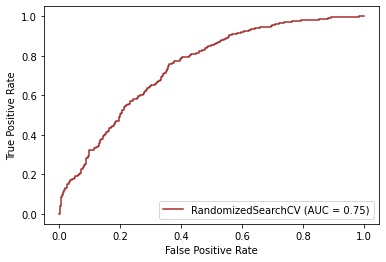

In [31]:
plot_roc_curve(classifier, x_test, y_test, color = "brown")

##III. ROC AUC Score

In [32]:
auc = print("ROC AUC SCORE: is 0.75")
print(auc)

ROC AUC SCORE: is 0.75
None
